In [2]:
from PIL import Image
import numpy as np
from typing import List
from pathlib import Path
import cv2
import matplotlib.pyplot as plt
import torch
import albumentations as A

# from albumentations.pytorch.transforms import ToTensorV2
from albumentations.pytorch import ToTensorV2

C:\Users\Claudia\Desktop\git\lightning_tablenet\env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
image_size = (896, 896)

# function to transform dataset_train
train_transform = A.Compose(
    [
        A.Resize(1024, 1024, always_apply=True),
        A.RandomResizedCrop(
            *image_size, scale=(0.7, 1.0), ratio=(0.7, 1)
        ),  # crop size limit=(896,896), height, width after crop and resize
        A.HorizontalFlip(),
        A.VerticalFlip(),
    ],
    #additional_targets={"table_mask": "image", "column_mask": "image"}
    #        A.Normalize(),
    #        ToTensorV2()
)

# function to transform dataset_val and dataset_test
test_transform = A.Compose(
    [A.Resize(*image_size, always_apply=True), A.Normalize(), ToTensorV2()]
)

In [4]:
def visualize(
    image,
    table_mask,
    column_mask,
    original_image=None,
    original_table_mask=None,
    original_column_mask=None,
):
    """
    Function to displaye images and transformed images after undergoing albumentations (train_transform/test_transform)

    Args:
        image (tensor): transformed image
        table_mask (tensor): transformed table_mask
        column_mask (tensor): transformed column_mask
        original_image (tensor): initial image
        original_table_mask (tensor): inital table_mask
        original_column_mask (tensor) :initail column_mask

    Usage example:
        image = cv2.imread('../../.bmp')
        table_mask = cv2.imread('../../table_mask/.bmp')
        column_mask = cv2.imread('../../column_mask/.bmp')
        visualize(image, table_mask, column_mask)
            >> <3 x 1 subplot images>
    """

    if (
        original_image is None
        and original_table_mask is None
        and original_column_mask is None
    ):
        f, ax = plt.subplots(3, 1, figsize=(20, 20))

        ax[0].imshow(image)
        ax[1].imshow(table_mask)
        ax[2].imshow(column_mask)

    else:
        f, ax = plt.subplots(3, 2, figsize=(20, 20))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title("Image")

        ax[1, 0].imshow(original_table_mask)
        ax[1, 0].set_title("Table mask")

        ax[2, 0].imshow(original_column_mask)
        ax[2, 0].set_title("Column mask")

        ax[0, 1].imshow(image)
        ax[0, 1].set_title("Transformed image")

        ax[1, 1].imshow(table_mask)
        ax[1, 1].set_title("Transformed table mask")

        ax[2, 1].imshow(column_mask)
        ax[2, 1].set_title("Transformed column mask")

In [5]:
DIR = "C:/Users/Claudia/Desktop/git/lightning_tablenet/data/"
MARMOT_DIR = f"{DIR}Marmot_data/"
TABLE_DIR = f"{DIR}table_mask/"
COLUMN_DIR = f"{DIR}column_mask/"

In [6]:
# To find out file_id
import os

unique_filename = [
    filename[:-4] for filename in os.listdir(MARMOT_DIR) if filename.endswith(".bmp")
]
print(len(unique_filename))

509


In [7]:
def path(file_id):
    image_path = f"{MARMOT_DIR}{file_id}" + ".bmp"
    column_path = f"{COLUMN_DIR}{file_id}" + ".bmp"
    table_path = f"{TABLE_DIR}{file_id}" + ".bmp"
    return image_path, column_path, table_path

In [14]:
unique_filename[4]

'10.1.1.1.2014_4'

Displaying original image, table_mask, column_mask

In [15]:
image = cv2.imread(
    "C:/Users/Claudia/Desktop/git/lightning_tablenet/data/Marmot_data/10.1.1.1.2014_4.bmp"
)
table_mask = cv2.imread(
    "C:/Users/Claudia/Desktop/git/lightning_tablenet/data/table_mask/10.1.1.1.2014_4.bmp"
)
column_mask = cv2.imread(
    "C:/Users/Claudia/Desktop/git/lightning_tablenet/data/column_mask/10.1.1.1.2014_4.bmp"
)

In [16]:
image.shape, table_mask.shape, column_mask.shape

((1056, 816, 3), (1056, 816, 3), (1056, 816, 3))

**Displaying original image, table_mask, column_mask**

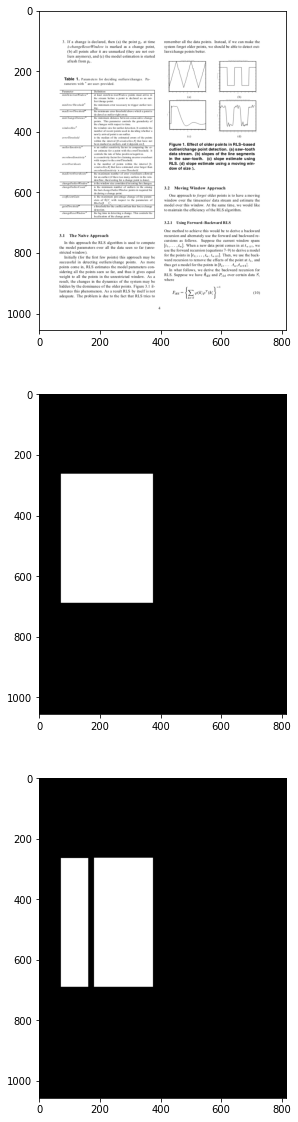

In [17]:
visualize(image, table_mask, column_mask)

**Undergoing transformation with train_transform**

In [21]:
transform = train_transform(image=image, table_mask=table_mask, column_mask=column_mask)

transform_image = transform['image']
transform_table_mask = transform['table_mask']
transform_column_mask = transform['column_mask']

print(transform_image.shape, transform_table_mask.shape, transform_column_mask.shape)

(896, 896, 3) (896, 896, 3) (896, 896, 3)


**Displaying original and transformed images**

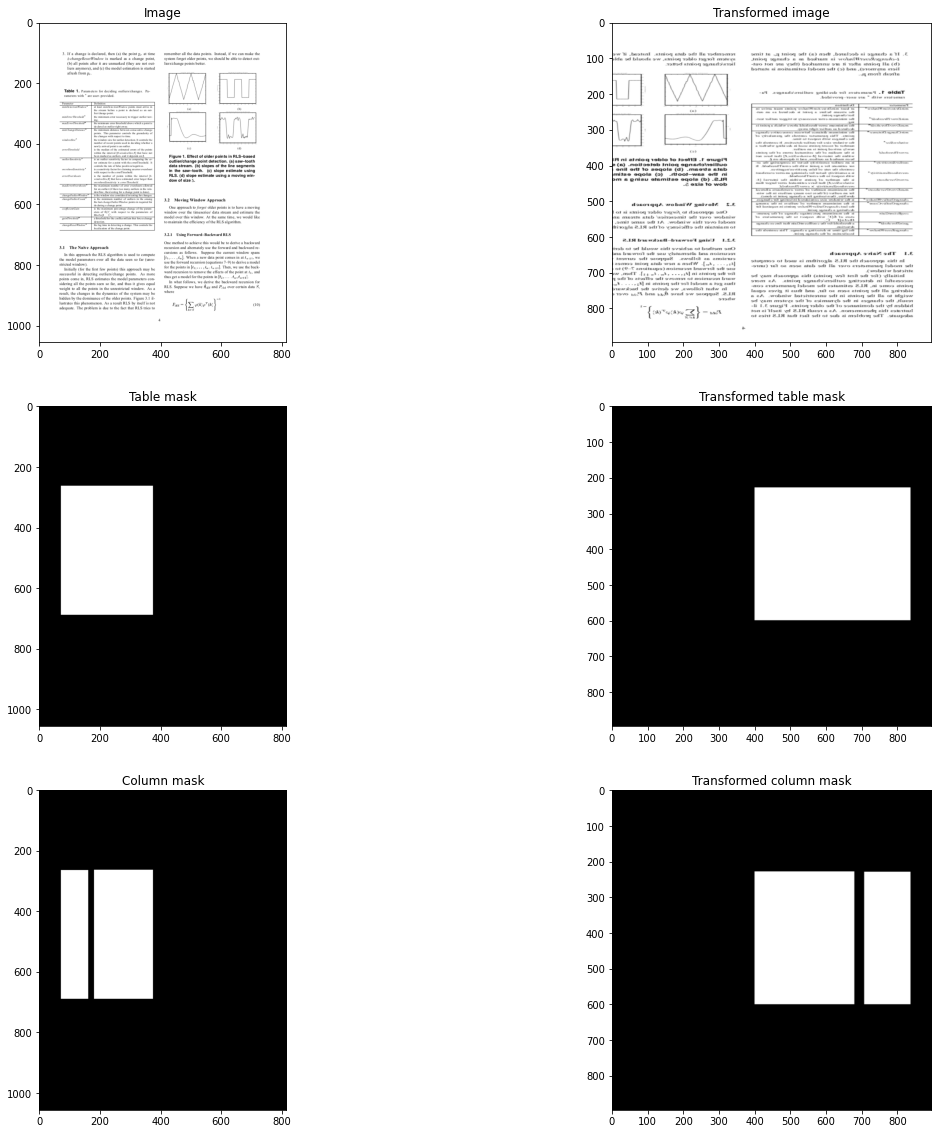

In [22]:
visualize(transform_image, transform_table_mask, transform_column_mask, original_image=image, original_table_mask=table_mask, original_column_mask=column_mask)

In [23]:
unique_filename[2]

'10.1.1.1.2013_63'

In [24]:
image2 = cv2.imread(
    "C:/Users/Claudia/Desktop/git/lightning_tablenet/data/Marmot_data/10.1.1.1.2013_63.bmp"
)
table_mask2 = cv2.imread(
    "C:/Users/Claudia/Desktop/git/lightning_tablenet/data/table_mask/10.1.1.1.2013_63.bmp"
)
column_mask2 = cv2.imread(
    "C:/Users/Claudia/Desktop/git/lightning_tablenet/data/column_mask/10.1.1.1.2013_63.bmp"
)

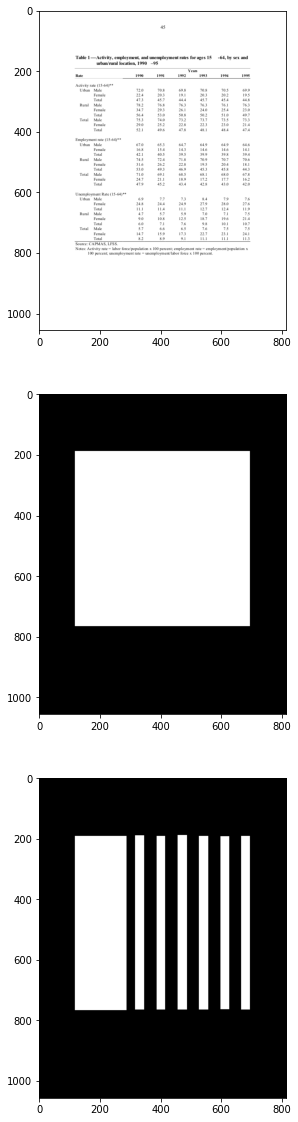

In [25]:
visualize(image2, table_mask2, column_mask2)

In [44]:
transform2 = train_transform(
    image=image2, table_mask=table_mask2, column_mask=column_mask2
)

transform_image2 = transform2["image"]
transform_table_mask2 = transform2["table_mask"]
transform_column_mask2 = transform2["column_mask"]

print(transform_image2.shape, transform_table_mask2.shape, transform_column_mask2.shape)

(896, 896, 3) (896, 896, 3) (896, 896, 3)


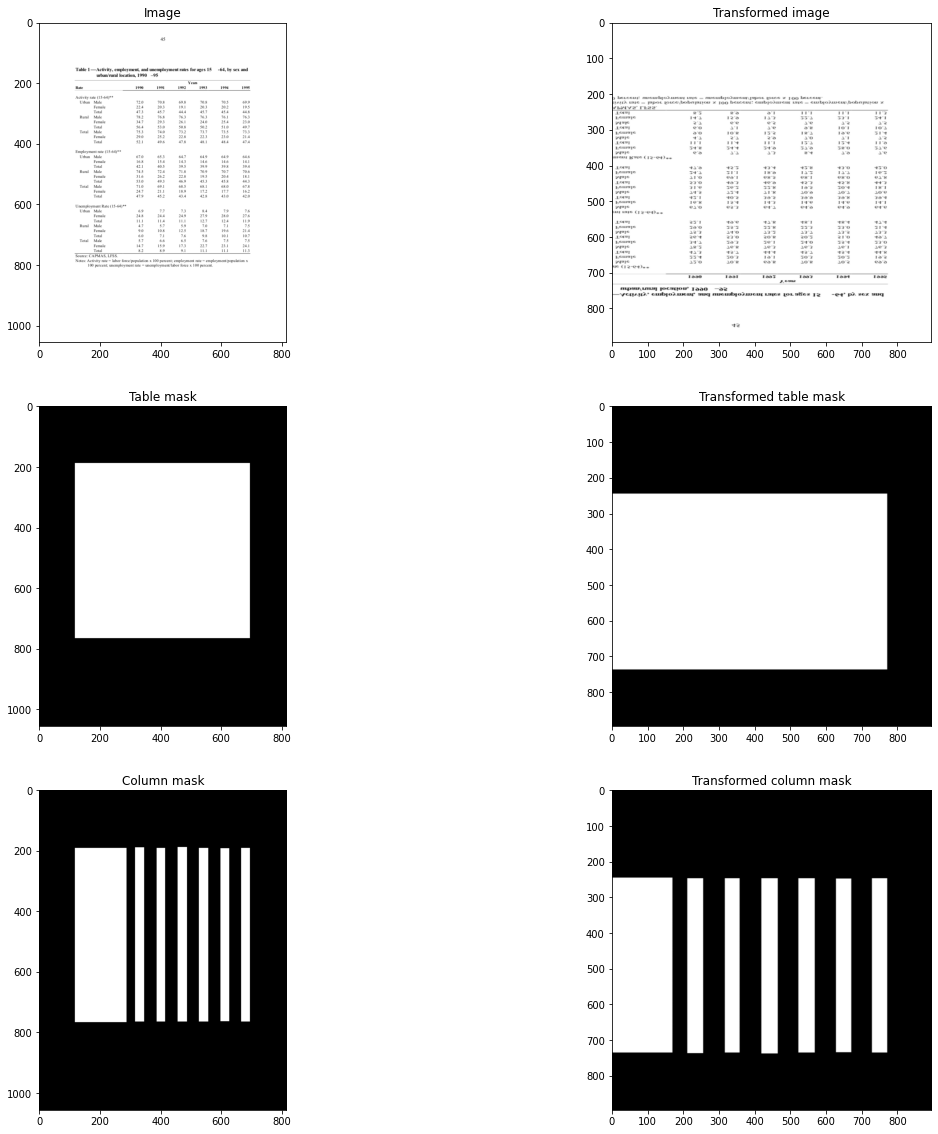

In [45]:
visualize(
    transform_image2,
    transform_table_mask2,
    transform_column_mask2,
    original_image=image2,
    original_table_mask=table_mask2,
    original_column_mask=column_mask2,
)